Code Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
# Set a consistent style for plots
plt.style.use('seaborn-v0_8-whitegrid')

Loading and Splitting Data Set

In [3]:
# (a) Load and Split the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("(a) Load and Split the Iris dataset")
print(f"Dataset Shape: X={X.shape}, y={y.shape}")
print(f"Training Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing Set: X_test={X_test.shape}, y_test={y_test.shape}\n")

(a) Load and Split the Iris dataset
Dataset Shape: X=(150, 4), y=(150,)
Training Set: X_train=(105, 4), y_train=(105,)
Testing Set: X_test=(45, 4), y_test=(45,)



Implementing Decision Tree Models

In [4]:
print("(b) Training Decision Trees with different max_depth values")
max_depths = [2, 3, 5, None] # None means unlimited depth
dt_models = {}
dt_accuracies = {}

best_dt_acc = 0
best_dt_depth = None
best_dt_model = None
y_pred_dt_best = None

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred_dt)
    dt_models[depth] = dt
    dt_accuracies[depth] = acc
    print(f"Decision Tree (max_depth={depth}): Test Accuracy = {acc:.4f}")

    if acc > best_dt_acc:
        best_dt_acc = acc
        best_dt_depth = depth
        best_dt_model = dt
        y_pred_dt_best = y_pred_dt

print(f"\nBest performing Decision Tree has max_depth={best_dt_depth} with Accuracy={best_dt_acc:.4f}\n")

(b) Training Decision Trees with different max_depth values
Decision Tree (max_depth=2): Test Accuracy = 0.8889
Decision Tree (max_depth=3): Test Accuracy = 0.9778
Decision Tree (max_depth=5): Test Accuracy = 0.9333
Decision Tree (max_depth=None): Test Accuracy = 0.9333

Best performing Decision Tree has max_depth=3 with Accuracy=0.9778



Implementing Multimax Softmax Regression

In [5]:
# --- (c) Train Multiclass Softmax Regression Model ---
print("(Training Softmax Regression Model)")
# Using LogisticRegression with multi_class='multinomial'
# Increased max_iter for convergence assurance
softmax_model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
softmax_model.fit(X_train, y_train)
y_pred_softmax = softmax_model.predict(X_test)
softmax_acc = accuracy_score(y_test, y_pred_softmax)
print(f"Softmax Regression: Test Accuracy = {softmax_acc:.4f}\n")

(Training Softmax Regression Model)
Softmax Regression: Test Accuracy = 0.9333



Evaluating Both Models

 Evaluating Best DT and Softmax Regression Models

(i) Performance Metrics (Weighted Average):

Decision Tree (depth=3):
  Accuracy:  0.9778
  Precision: 0.9792
  Recall:    0.9778
  F1-Score:  0.9778

Softmax Regression:
  Accuracy:  0.9333
  Precision: 0.9345
  Recall:    0.9333
  F1-Score:  0.9333

(ii) Confusion Matrices:


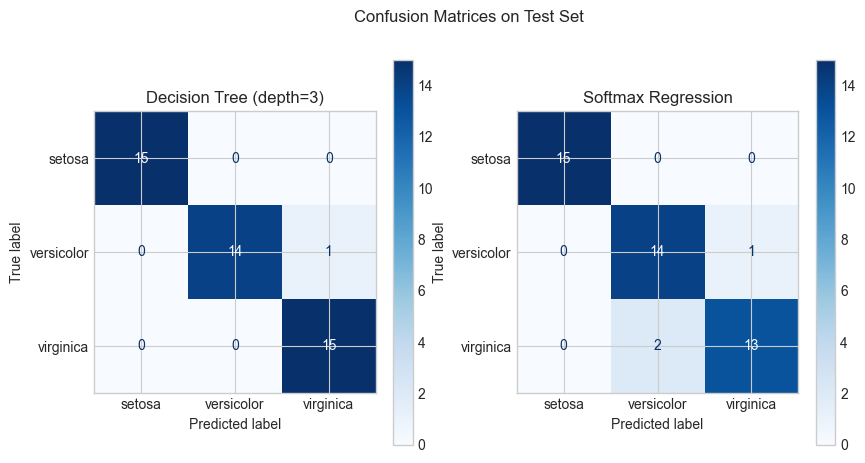

In [6]:
print(" Evaluating Best DT and Softmax Regression Models")

models_to_evaluate = {
    f"Decision Tree (depth={best_dt_depth})": (best_dt_model, y_pred_dt_best), # Using predictions from the best DT run
    "Softmax Regression": (softmax_model, y_pred_softmax)
}

# (i) Report accuracy, precision, recall, and F1-score
print("\n(i) Performance Metrics (Weighted Average):")
for name, (model, y_pred) in models_to_evaluate.items():
    acc = accuracy_score(y_test, y_pred)
    # Using weighted average for precision, recall, F1 to account for class distribution (though Iris is balanced)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f"\n{name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    # (ii) Generate and analyze the confusion matrix
print("\n(ii) Confusion Matrices:")
fig_cm, axes_cm = plt.subplots(1, 2, figsize=(10, 5))
fig_cm.suptitle("Confusion Matrices on Test Set")

for i, (name, (model, y_pred)) in enumerate(models_to_evaluate.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=axes_cm[i], cmap=plt.cm.Blues)
    axes_cm[i].set_title(name)
plt.show()

Plotting Decision Boundries


(iii) Plotting Decision Boundaries (First Two Features)...


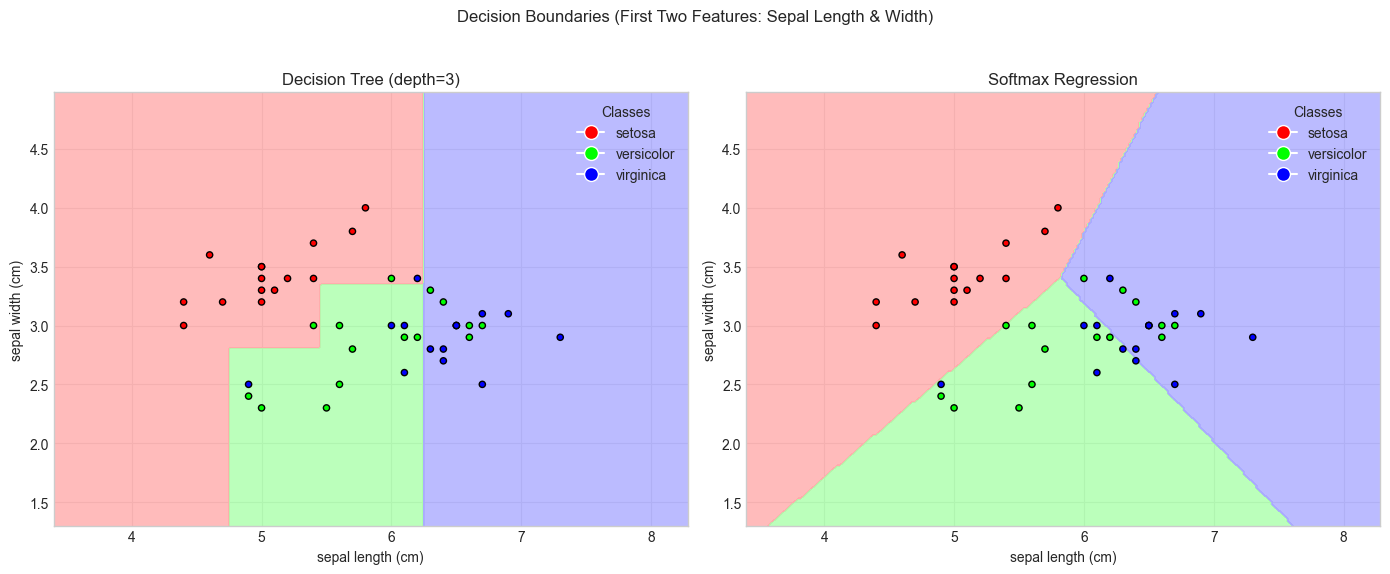

In [7]:
print("\n(iii) Plotting Decision Boundaries (First Two Features)...")

# Use only the first two features for visualization
X_train_2f = X_train[:, :2]
X_test_2f = X_test[:, :2]
y_train_2f = y_train # Labels remain the same
y_test_2f = y_test

# Retrain models using only the first two features
best_dt_model_2f = DecisionTreeClassifier(max_depth=best_dt_depth, random_state=42)
best_dt_model_2f.fit(X_train_2f, y_train_2f)

softmax_model_2f = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
softmax_model_2f.fit(X_train_2f, y_train_2f)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # step size in the mesh
    # Define colormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # Light Red, Green, Blue
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold Red, Green, Blue

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot also the training points (or test points)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=target_names[i],
                          markerfacecolor=cmap_bold.colors[i], markersize=10) for i in range(len(target_names))]
    ax.legend(handles=legend_elements, title="Classes")


fig_db, axes_db = plt.subplots(1, 2, figsize=(14, 6))
fig_db.suptitle("Decision Boundaries (First Two Features: Sepal Length & Width)")

# Plot Decision Tree Boundary
plot_decision_boundary(X_test_2f, y_test_2f, best_dt_model_2f, axes_db[0], f"Decision Tree (depth={best_dt_depth})")

# Plot Softmax Regression Boundary
plot_decision_boundary(X_test_2f, y_test_2f, softmax_model_2f, axes_db[1], "Softmax Regression")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout

# Show all plots generated
plt.show()